In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mafki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
data_path = "../data/txt/"

In [4]:
DECADE = '1940'

In [8]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [9]:

texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [10]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [11]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [12]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [13]:
tfidf_vectors.shape

(1000, 4622)

In [14]:
#imprimer le vecteur du premier document
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

gouvernement    0.158590
milieux         0.154867
cabinet         0.133415
neige           0.118099
politiques      0.117663
                  ...   
dépôts          0.000000
désigné         0.000000
désir           0.000000
désirent        0.000000
♦               0.000000
Length: 4622, dtype: float64

In [15]:
N_CLUSTERS = 3

In [16]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [17]:
clusters = km_model.fit_predict(tfidf_vectors)

In [18]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [19]:
pprint(dict(clustering))

{0: ['KB_JB838_1940-01-07_01-00014.txt',
     'KB_JB838_1940-01-19_01-00005.txt',
     'KB_JB838_1940-02-01_01-00006.txt',
     'KB_JB838_1940-02-06_01-00005.txt',
     'KB_JB838_1940-02-07_01-00005.txt',
     'KB_JB838_1940-02-09_01-00005.txt',
     'KB_JB838_1940-02-12_01-00005.txt',
     'KB_JB838_1940-02-18_01-00014.txt',
     'KB_JB838_1940-02-20_01-00007.txt',
     'KB_JB838_1940-03-02_01-00007.txt',
     'KB_JB838_1940-03-04_01-00005.txt',
     'KB_JB838_1940-03-10_01-00008.txt',
     'KB_JB838_1940-03-10_01-00010.txt',
     'KB_JB838_1940-04-03_01-00007.txt',
     'KB_JB838_1940-04-07_01-00008.txt',
     'KB_JB838_1940-04-16_01-00008.txt',
     'KB_JB838_1940-04-22_01-00005.txt',
     'KB_JB838_1940-06-30_01-00005.txt',
     'KB_JB838_1940-07-21_01-00005.txt',
     'KB_JB838_1940-07-22_01-00006.txt',
     'KB_JB838_1940-07-24_01-00005.txt',
     'KB_JB838_1940-07-31_01-00005.txt',
     'KB_JB838_1940-08-02_01-00004.txt',
     'KB_JB838_1940-08-25_01-00005.txt',
     'KB_JB838_1

In [20]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

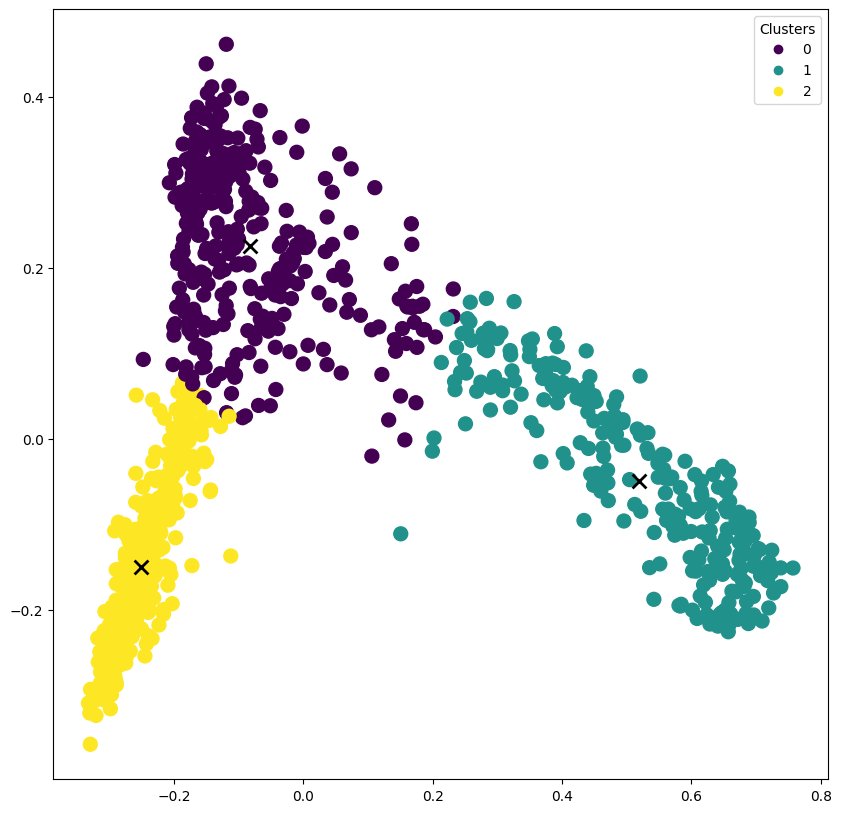

In [21]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [22]:
#nombre optimal de clusters
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
    }
   
    # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(tfidf_vectors)
     sse.append(kmeans.inertia_)

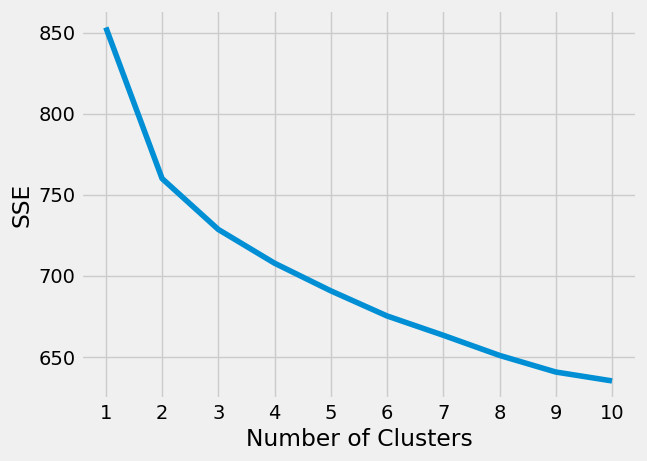

In [23]:
#imprimer graphique correspondant
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
#générer le 'knee-point' automatiquement à partir du graphique
from kneed import KneeLocator
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
   )

print("le nombre optimal de clusters pour la décennie 1940 est" , kl.elbow)

le nombre optimal de clusters pour la décennie 1940 est 3


In [25]:
#explorer les clusters
cluster1 = dict(clustering)[0]
cluster2 = dict(clustering)[1]
cluster3 = dict(clustering)[2]
print(type(cluster1))

<class 'list'>


In [26]:
import os
import yake

In [27]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [28]:
for f in cluster1:
    text1 = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    

for l in cluster2:
    text2 = open(os.path.join(data_path, l), 'r', encoding="utf-8").read()

for m in cluster3:
    text3 = open(os.path.join(data_path, m), 'r', encoding="utf-8").read()

In [29]:
#extraire les mots clés de chaques cluster
keywords1 = kw_extractor.extract_keywords(text1)
keywords2 = kw_extractor.extract_keywords(text2)
keywords3 = kw_extractor.extract_keywords(text3)

In [30]:
#imprimer les keywords par cluster
keywords1

[('EDITION PARUE MERCREDI', 0.0002475902664243716),
 ('DERNIERE EDITION PARUE', 0.00025628081531880044),
 ('The Saturday Evening', 0.0013232619918844646),
 ('Saturday Evening Post', 0.0013956078495535394),
 ('PAGES LE SOIR', 0.0027741687351176274),
 ('PARUE MERCREDI', 0.0037968078370364667),
 ('DERNIERE EDITION', 0.004065647727550112),
 ('EDITION PARUE', 0.004065647727550112),
 ('The Saturday', 0.005561104178479869),
 ('SOIR LE SOIR', 0.005788361268114781),
 ('Saturday Evening', 0.0060180352737342355),
 ('Evening Post', 0.008499269571677244),
 ('aufviettëeur LA DERNIERE', 0.010670930442379425),
 ('nuit Dern', 0.012498283570234012),
 ('The Saturday Even', 0.013093129450091279),
 ('SOIR', 0.02287965452464708),
 ('Tél', 0.024940369093738694),
 ('Saturday', 0.02605318467854987),
 ('réclafeèz aufviettëeur', 0.027967044729376275),
 ('Edition de nuit', 0.03225006073610312),
 ('EDITION', 0.03236049165583436),
 ('The', 0.03442663156194536),
 ('Post', 0.035189642920000735),
 ('New-York', 0.03597

In [31]:
keywords2

[('dem', 0.0021308638677270974),
 ('ROSSEL', 0.004115260454801539),
 ('RUE', 0.005882661058985546),
 ('ECRIRE AGENCE ROSSEL', 0.005993467240756752),
 ('Bon', 0.008660073973006109),
 ('Ecr', 0.011788738712731884),
 ('Ecrire', 0.012258292462243138),
 ('Tél', 0.013624415702774215),
 ('demande', 0.01408603361675028),
 ('AGENCE ROSSEL', 0.0144667357859983),
 ('l’AGENCE ROSSEL', 0.019054889807452288),
 ('Ag.Rossel', 0.021531780310156817),
 ('dem.', 0.023478329011572707),
 ('DEMANDE BON OUVRIER', 0.027012254399232934),
 ('cherche', 0.029512248718394887),
 ('ECRIRE AGENCE', 0.029823424741549975),
 ('ouvrier', 0.0310809997132039),
 ('BON OUVRIER', 0.03141680564961231),
 ('servante', 0.03254183801200929),
 ('trav', 0.032758936339633046),
 ('prés', 0.03335369288342734),
 ('Bruxelles', 0.033757636855154906),
 ('place', 0.03453284839269947),
 ('bons', 0.034640295892024435),
 ('ans', 0.036987714316015684),
 ('DEMANDE BON', 0.03778706473993231),
 ('Bons gages', 0.03833828315202729),
 ('Brux', 0.04060

In [32]:
keywords3

[('Union française', 0.005931614747218234),
 ('LITRE', 0.013395592120525058),
 ('Mme', 0.02242053251668913),
 ('SOIR', 0.022563988008544617),
 ('Union', 0.02375227975015617),
 ('litres', 0.02487752822383225),
 ('France', 0.02621280232986761),
 ('cours', 0.02772608523706049),
 ('Belges', 0.029061616743827214),
 ('matinée enfantine', 0.031004772904374214),
 ('Noël', 0.031197323314150874),
 ('Français', 0.031756542823642195),
 ('ministre', 0.03460905695386815),
 ('Bruxelles', 0.036016319761196944),
 ('Ingenbleek', 0.0382110784021821),
 ('président', 0.0385764619671599),
 ('Belgique', 0.03928089797897446),
 ('Grand Prix', 0.04070299522723815),
 ('qu’il', 0.04236957742891755),
 ('van', 0.04535335294641122),
 ('SOIR voie voie', 0.04796513734384463),
 ('chômage', 0.048066017858033924),
 ('ministère', 0.05095952673282577),
 ('grand', 0.05118007679075401),
 ('nouveau', 0.05138696686380919),
 ('Petit Poucet', 0.05397236938685825),
 ('délégué', 0.055030182440899536),
 ('compresseur', 0.0556418852

In [33]:
#générer le nuage des mots
#imports
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mafki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#générer une liste de stopwords pour un résultat plus pertinent
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "de", "Tél", "la", "au", "une", "un", "à", "pour", "qui", "il", "saturday", "rue", "the", "nf", "fr", "gr", "ép", "frs", "cherc", "Bd", "B", "vatric", 
       "st", "VI", "sit", "EC", "bl", "U", "V", "a", "si", "or", "e", "AG", "ANC", "mois", "autres", "soir", 
       "EDITION", "H", "neuf", "vue", "nom", "H", "TIENT", "dé", "bruxelles", "dés", "vactric", "post",
       "MORRIS", "ANVERS", "etc", "I", "mant", "W", "fow", "tf", "p", "sér", "av", "prés", 
       "Brux", "av", "pl", "dom", "p", "ex", "f", "sér", "an", "pl", "ch", "fem", "enf", "per",
       "ouvr", "chez", "ans", "Ecr", "référ", "hissions", "posséd", "renc", "exig", 
       "pr", "r", "trav", "JNE", "très", "moût", "réf", "ni", "pen", "aven", "pet", "pers",
       "serv", "jour", "pet", "deh", "inut",  ]
sw = set(sw)

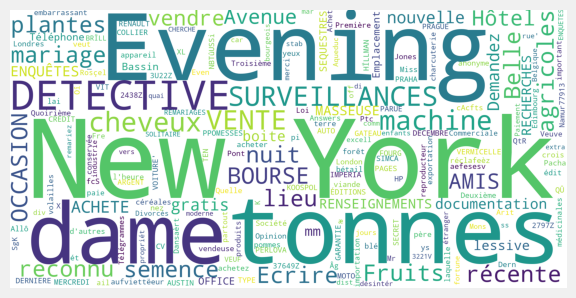

In [35]:
#nuage des mots relatif au premier cluster
cloud1 = WordCloud(width=2000, height=1000, background_color='white', stopwords=sw).generate(text1)
wordcloud_image = cloud1.fit_words

def plot_cloud(cloud):
    
    #générer l'image 
    plt.imshow(cloud1, interpolation='bilinear') 
    # No axis details
    plt.axis("off");


plt.imshow(cloud1)
plt.axis("off")
plt.show()



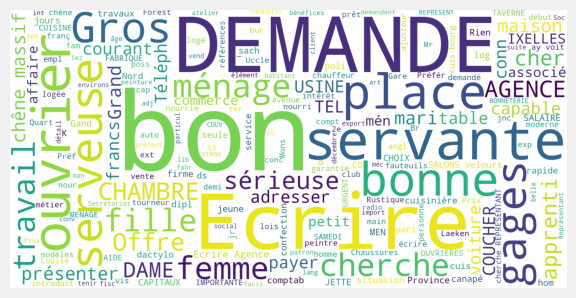

In [36]:
#nuage des mots relatif au deuxième cluster
cloud2 = WordCloud(width=2000, height=1000, background_color='white', stopwords=sw).generate(text2)
wordcloud_image = cloud2.fit_words

def plot_cloud(cloud):
    
    #générer l'image 
    plt.imshow(cloud2, interpolation='bilinear') 
    # No axis details
    plt.axis("on");


plt.imshow(cloud2)
plt.axis("off")
plt.show()

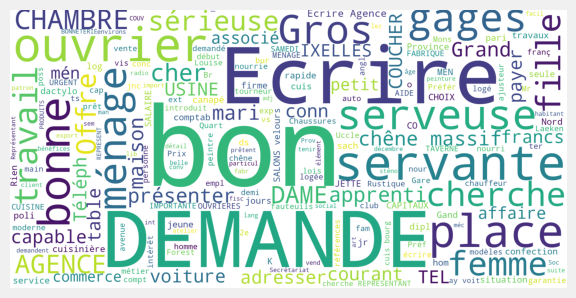

In [37]:
#nuage des mots relatif au troisième cluster
cloud3 = WordCloud(width=2000, height=1000, background_color='white', stopwords=sw).generate(text2)
wordcloud_image = cloud3.fit_words

def plot_cloud(cloud):
    
    #générer l'image 
    plt.imshow(cloud3, interpolation='bilinear') 
    # No axis details
    plt.axis("on");


plt.imshow(cloud3)
plt.axis("off")
plt.show()